Numerical target data analysis::
read of file::To undentify the best fitted model for identifying bodyfat value by considering other dependent variables.

In [199]:
import pandas as pd
#path=E:\Python Dataset\BankCreditCard.csv
bf=pd.read_csv(r"E:\Python Dataset\Bodyfat.csv")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
from sklearn.linear_model import LinearRegression
import warnings 
warnings.filterwarnings('ignore')
bf.shape
#bf=bf.drop(["Bodyfat"],axis=1)
bf.shape
bf.head(10)
bf.tail(10)

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
90,22.1,43,150.00,69.25,35.2,91.1,85.7,22.0,29.4,17.4
91,27.2,49,216.25,74.50,40.2,115.6,104.0,23.2,36.8,18.9
92,28.4,50,196.75,68.25,42.1,105.6,98.8,24.7,33.2,19.4
93,3.7,27,159.25,71.50,35.7,89.6,79.7,22.5,29.9,17.7
94,10.3,23,188.15,77.50,38.0,96.6,85.3,23.2,31.8,18.3
95,20.1,48,177.25,72.75,36.8,96.0,90.0,22.8,29.9,18.1
96,29.4,43,187.75,74.00,37.7,97.8,98.6,23.8,34.3,17.7
97,13.0,33,184.25,68.75,40.7,98.9,92.1,23.5,33.5,19.7
98,25.2,26,223.00,70.25,40.6,114.1,106.8,24.7,36.0,18.4
99,4.0,47,127.50,66.75,34.0,83.4,70.4,21.9,26.8,16.8


data cleaning::preprocessing::

In [4]:
bf.isnull().sum()

Bodyfat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Ankle      0
Biceps     0
Wrist      0
dtype: int64

In [5]:
bf.dtypes

Bodyfat    float64
Age          int64
Weight     float64
Height     float64
Neck       float64
Chest      float64
Abdomen    float64
Ankle      float64
Biceps     float64
Wrist      float64
dtype: object

In [6]:
bf.shape 

(100, 10)

In [7]:
bf.drop_duplicates(inplace=True)

In [8]:
bf.shape

(100, 10)

EDA process::class imbalance::

as it is a numerical column so class imbalance is not applied here .

outlier treatment::

In [12]:
l1=bf["Age"]
l1

0     41
1     31
2     42
3     23
4     46
      ..
95    48
96    43
97    33
98    26
99    47
Name: Age, Length: 100, dtype: int64

In [13]:
outliers=[]
def detect_outlier(l1):
 threshold=3
 mean=np.mean(l1)
 std=np.std(l1)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l1)

<Axes: ylabel='Age'>

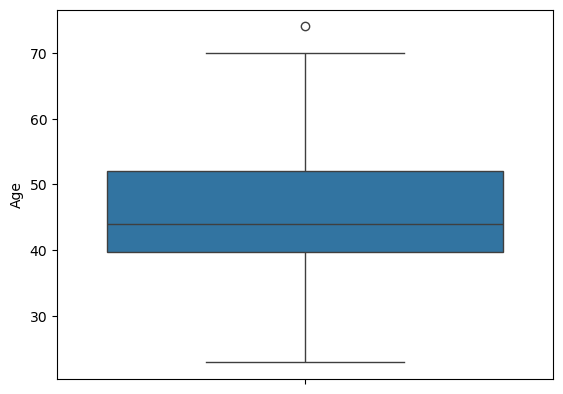

In [14]:
import seaborn as sns
sns.boxplot(data=bf,y="Age")

<Axes: >

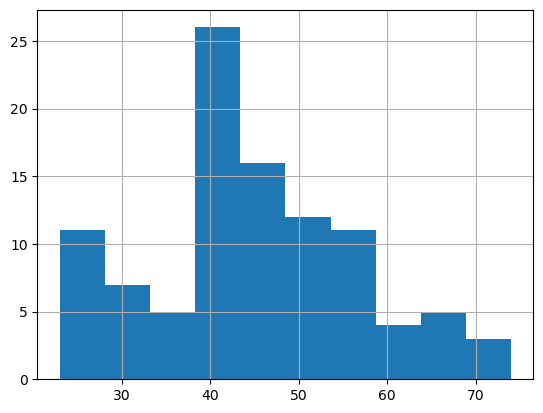

In [15]:
bf.Age.hist()

<Axes: xlabel='Age', ylabel='Density'>

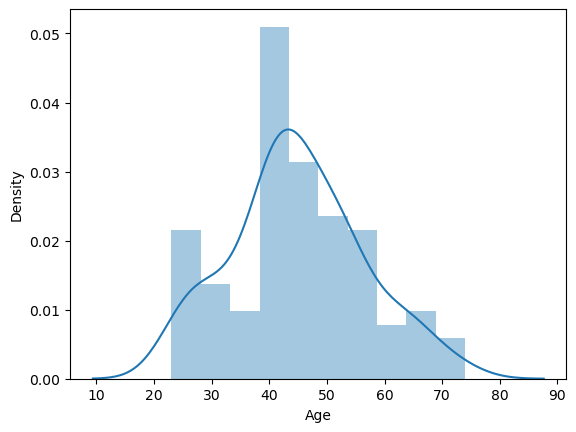

In [16]:
sns.distplot(bf.Age)# no skewness has found to treat.

In [17]:
ub=bf["Age"].mean()+3*bf["Age"].std()
lb=bf["Age"].mean()-3*bf["Age"].std()
print(ub,lb)

79.13381199755199 10.626188002448025


In [18]:
bf["Age"].describe()

count    100.000000
mean      44.880000
std       11.417937
min       23.000000
25%       39.750000
50%       44.000000
75%       52.000000
max       74.000000
Name: Age, dtype: float64

<Axes: ylabel='Age'>

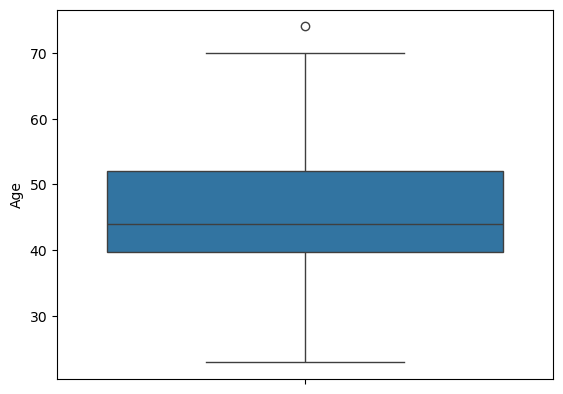

In [19]:
bf.loc[bf["Age"]>ub,"Age"]=ub
sns.boxplot(data=bf,y="Age")

In [20]:
l2=bf["Weight"]
l2

0     247.25
1     177.25
2     156.25
3     154.25
4     177.00
       ...  
95    177.25
96    187.75
97    184.25
98    223.00
99    127.50
Name: Weight, Length: 100, dtype: float64

In [21]:
outliers=[]
def detect_outlier(l2):
 threshold=3
 mean=np.mean(l2)
 std=np.std(l2)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l2)

<Axes: ylabel='Weight'>

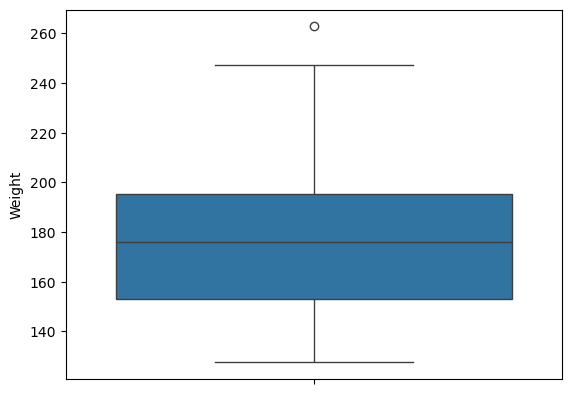

In [22]:
import seaborn as sns
sns.boxplot(data=bf,y="Weight")

<Axes: >

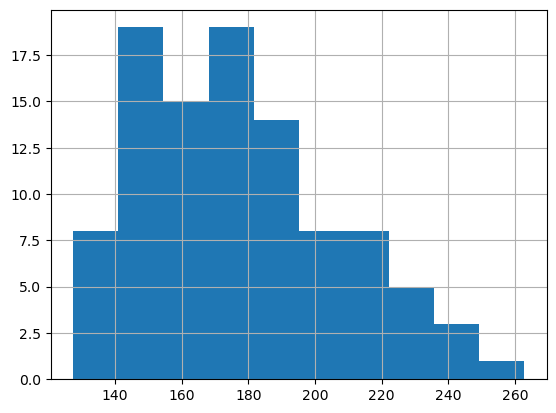

In [23]:
bf.Weight.hist()

<Axes: xlabel='Age', ylabel='Density'>

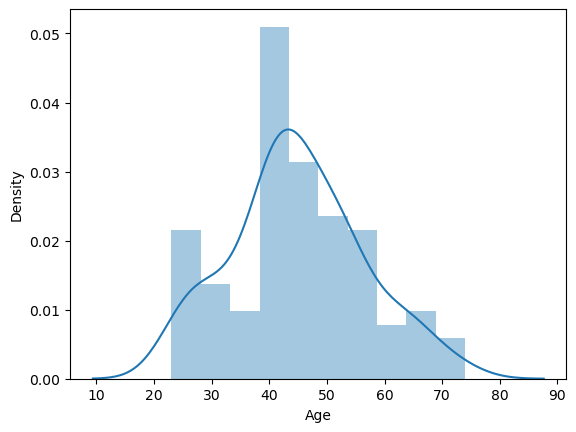

In [24]:
sns.distplot(bf.Age)# no skewness has found to treat.

In [25]:
ub=bf["Weight"].mean()+3*bf["Weight"].std()
lb=bf["Weight"].mean()-3*bf["Weight"].std()
print(ub,lb)

265.97554001944127 88.92745998055877


In [26]:
bf["Weight"].describe()

count    100.000000
mean     177.451500
std       29.508013
min      127.500000
25%      152.937500
50%      176.125000
75%      195.437500
max      262.750000
Name: Weight, dtype: float64

<Axes: ylabel='Weight'>

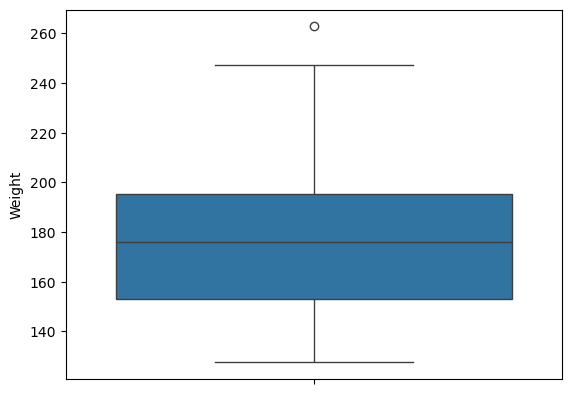

In [27]:
bf.loc[bf["Weight"]>ub,"Weight"]=ub
sns.boxplot(data=bf,y="Weight")

<Axes: ylabel='Height'>

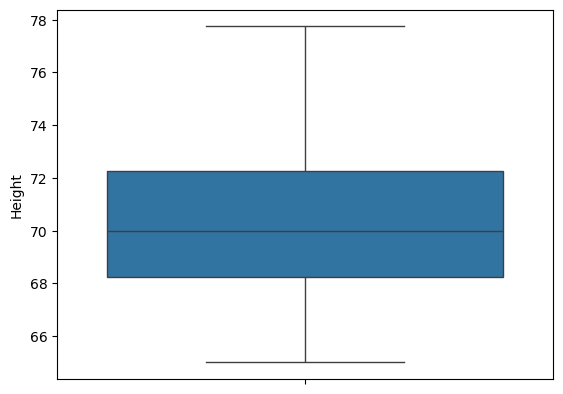

In [28]:
import seaborn as sns
sns.boxplot(data=bf,y="Height")#no outlier has found to treat.

<Axes: xlabel='Height', ylabel='Density'>

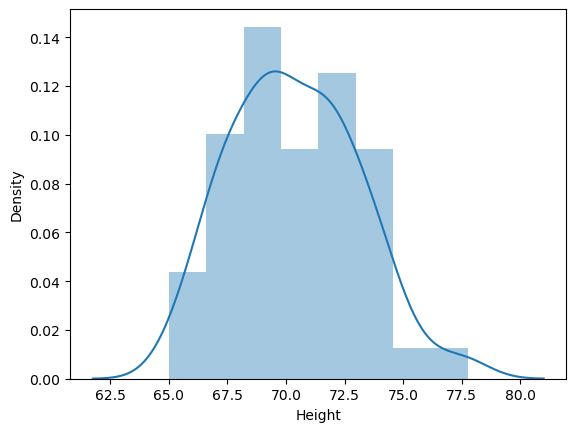

In [29]:
sns.distplot(bf.Height)# no skewness has found to treat.

<Axes: ylabel='Neck'>

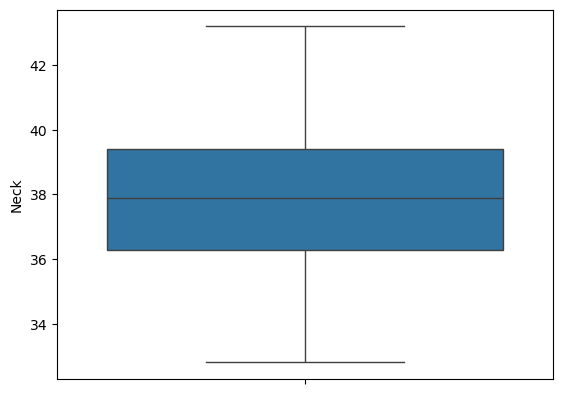

In [30]:
import seaborn as sns
sns.boxplot(data=bf,y="Neck")#no outlier has found to treat.

<Axes: xlabel='Neck', ylabel='Density'>

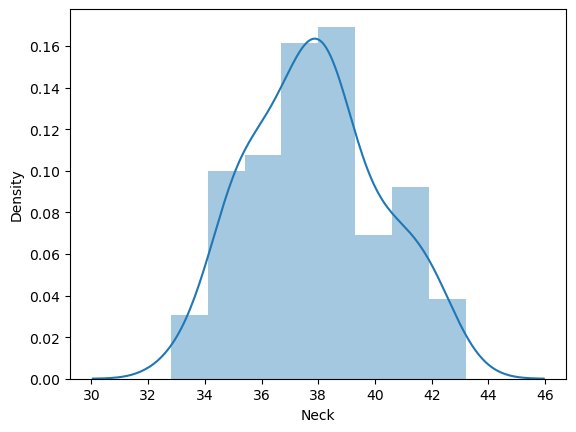

In [31]:
sns.distplot(bf.Neck)# no skewness has found to treat.

<Axes: ylabel='Chest'>

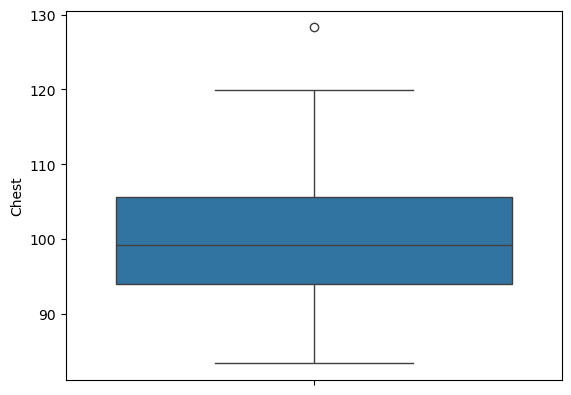

In [32]:
import seaborn as sns
sns.boxplot(data=bf,y="Chest")

<Axes: xlabel='Chest', ylabel='Density'>

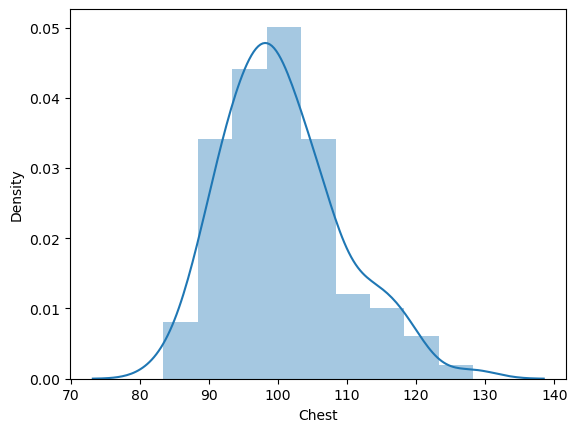

In [33]:
sns.distplot(bf.Chest)

In [34]:
l3=bf["Chest"]
l3

0     117.0
1     101.1
2      97.8
3      93.1
4      99.7
      ...  
95     96.0
96     97.8
97     98.9
98    114.1
99     83.4
Name: Chest, Length: 100, dtype: float64

In [35]:
outliers=[]
def detect_outlier(l3):
 threshold=3
 mean=np.mean(l3)
 std=np.std(l3)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l3)

In [36]:
ub=bf["Chest"].mean()+3*bf["Chest"].std()
lb=bf["Chest"].mean()-3*bf["Chest"].std()
print(ub,lb)

126.23047766767274 75.1315223323272


In [37]:
bf["Chest"].describe()

count    100.000000
mean     100.681000
std        8.516493
min       83.400000
25%       94.000000
50%       99.250000
75%      105.600000
max      128.300000
Name: Chest, dtype: float64

<Axes: ylabel='Chest'>

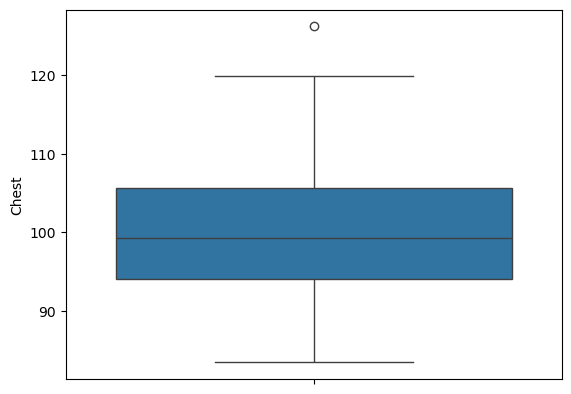

In [38]:
bf.loc[bf["Chest"]>ub,"Chest"]=ub
sns.boxplot(data=bf,y="Chest")

In [39]:
#skewness treatment::
bf.Chest.skew()

0.6253126256461117

In [40]:
import numpy as np
np.log(0)

-inf

In [41]:
bf.shape

(100, 10)

In [42]:
bf_new=bf[bf.Chest>0]

In [43]:
bf_new.shape

(100, 10)

In [44]:
IQR=bf.Chest.quantile(0.75)-bf.Chest.quantile(0.25)
L1=bf["Chest"].quantile(0.25)-(IQR*3)
U1=bf["Chest"].quantile(0.75)+(IQR*3)
print(L1,U1)

59.20000000000002 140.39999999999998


In [45]:
bf["Chest"]=np.log(bf["Chest"])
bf.Chest.skew()

0.4145911854496069

<Axes: xlabel='Chest', ylabel='Density'>

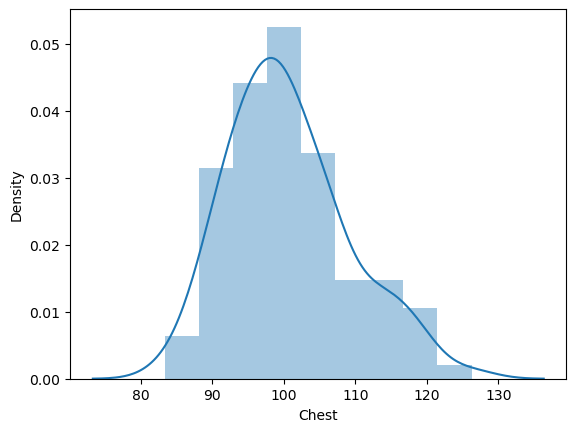

In [46]:
sns.distplot(bf_new.Chest)

<Axes: ylabel='Abdomen'>

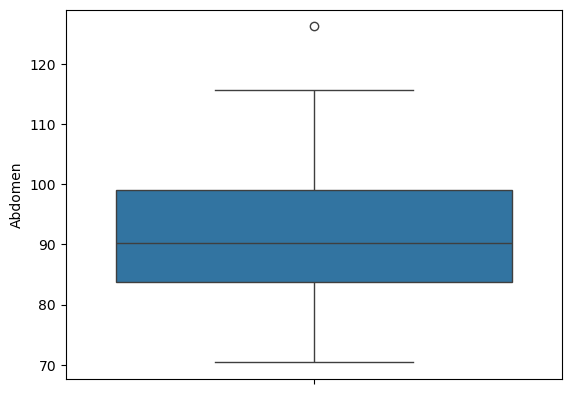

In [47]:
import seaborn as sns
sns.boxplot(data=bf,y="Abdomen")

<Axes: xlabel='Abdomen', ylabel='Density'>

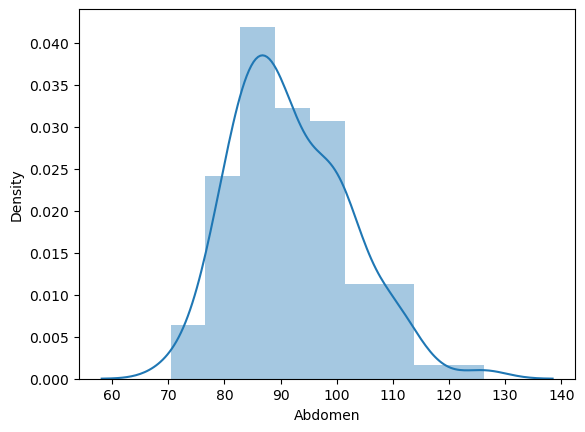

In [48]:
sns.distplot(bf.Abdomen)

In [49]:
l4=bf["Abdomen"]
l4

0     115.6
1      92.4
2      86.0
3      85.2
4      95.6
      ...  
95     90.0
96     98.6
97     92.1
98    106.8
99     70.4
Name: Abdomen, Length: 100, dtype: float64

In [50]:
outliers=[]
def detect_outlier(l4):
 threshold=3
 mean=np.mean(l4)
 std=np.std(l4)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l4)

In [51]:
ub=bf["Abdomen"].mean()+3*bf["Abdomen"].std()
lb=bf["Abdomen"].mean()-3*bf["Abdomen"].std()
print(ub,lb)

122.65070451450512 61.08329548549485


In [52]:
bf["Abdomen"].describe()

count    100.000000
mean      91.867000
std       10.261235
min       70.400000
25%       83.825000
50%       90.150000
75%       98.975000
max      126.200000
Name: Abdomen, dtype: float64

<Axes: ylabel='Abdomen'>

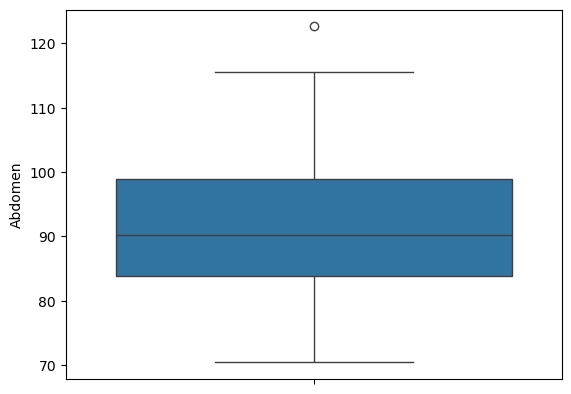

In [53]:
bf.loc[bf["Abdomen"]>ub,"Abdomen"]=ub
sns.boxplot(data=bf,y="Abdomen")

skewness treatment::

In [55]:
bf.Abdomen.skew()

0.5368688569989267

In [56]:
import numpy as np
np.log(0)

-inf

In [57]:
bf.shape

(100, 10)

In [58]:
bf_new=bf[bf.Abdomen>0]

In [59]:
bf_new.shape

(100, 10)

In [60]:
bf["Abdomen"]=np.log(bf["Abdomen"])
bf.Abdomen.skew()

0.2739502409664528

<Axes: xlabel='Abdomen', ylabel='Density'>

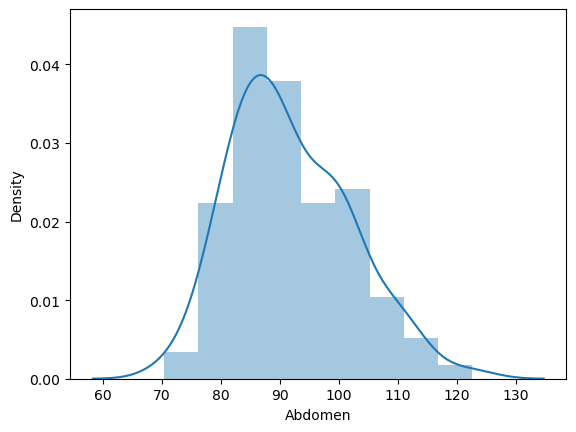

In [61]:
sns.distplot(bf_new.Abdomen)

In [62]:
IQR=bf.Abdomen.quantile(0.75)-bf.Abdomen.quantile(0.25)
L1=bf["Abdomen"].quantile(0.25)-(IQR*3)
U1=bf["Abdomen"].quantile(0.75)+(IQR*3)
print(L1,U1)

3.9303210628775194 5.093275459794222


<Axes: xlabel='Abdomen', ylabel='Density'>

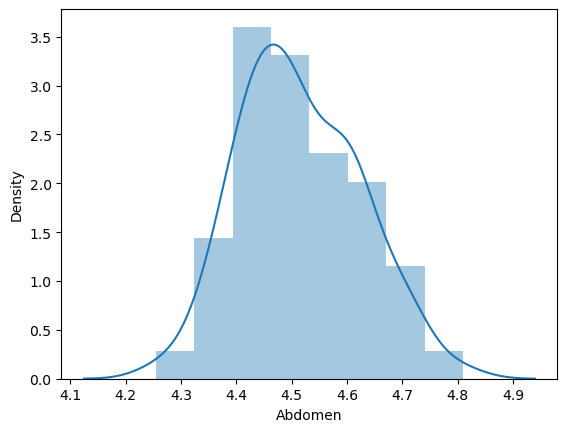

In [63]:
bf.loc[bf["Abdomen"]>U1,"Abdomen"]=U1
sns.distplot(bf.Abdomen)

<Axes: ylabel='Ankle'>

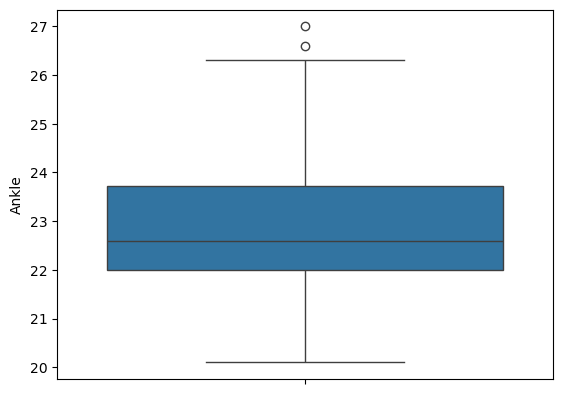

In [64]:
import seaborn as sns
sns.boxplot(data=bf,y="Ankle")

<Axes: xlabel='Ankle', ylabel='Density'>

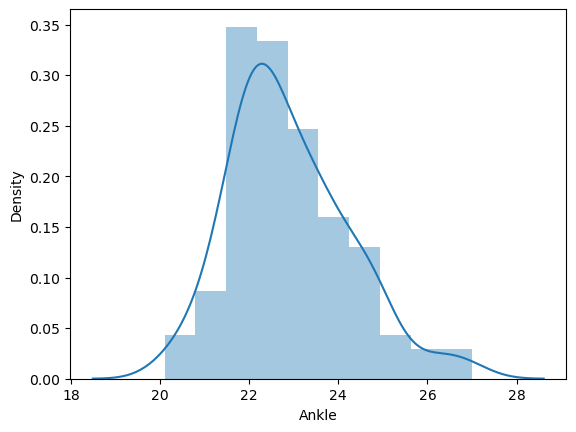

In [65]:
sns.distplot(bf.Ankle)

In [66]:
l5=bf["Ankle"]
l5

0     26.3
1     24.6
2     24.0
3     21.9
4     22.5
      ... 
95    22.8
96    23.8
97    23.5
98    24.7
99    21.9
Name: Ankle, Length: 100, dtype: float64

In [67]:
outliers=[]
def detect_outlier(l5):
 threshold=3
 mean=np.mean(l5)
 std=np.std(l5)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l5)

In [68]:
ub=bf["Ankle"].mean()+3*bf["Ankle"].std()
lb=bf["Ankle"].mean()-3*bf["Ankle"].std()
print(ub,lb)

26.939351883206474 18.860648116793538


In [69]:
bf["Ankle"].describe()

count    100.000000
mean      22.900000
std        1.346451
min       20.100000
25%       22.000000
50%       22.600000
75%       23.725000
max       27.000000
Name: Ankle, dtype: float64

<Axes: ylabel='Ankle'>

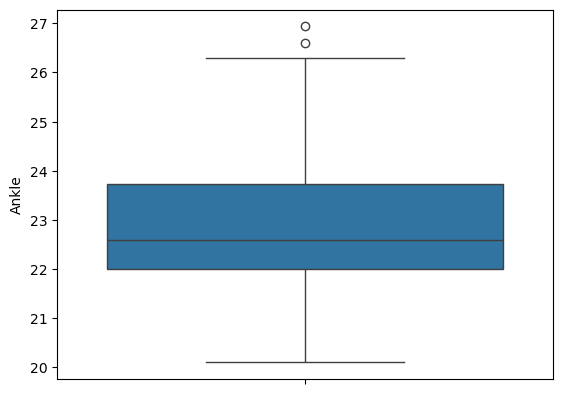

In [70]:
bf.loc[bf["Ankle"]>ub,"Ankle"]=ub
sns.boxplot(data=bf,y="Ankle")

skewness treatment::

In [72]:
bf.Ankle.skew()

0.6643855441009734

In [73]:
import numpy as np
np.log(0)

-inf

In [74]:
bf_new=bf[bf.Ankle>0]

In [75]:
bf["Ankle"]=np.log(bf["Ankle"])
bf.Ankle.skew()

0.49816923049454337

In [76]:
IQR=bf.Ankle.quantile(0.75)-bf.Ankle.quantile(0.25)
L1=bf["Ankle"].quantile(0.25)-(IQR*3)
U1=bf["Ankle"].quantile(0.75)+(IQR*3)
print(L1,U1)

2.864586769607749 3.3929833650257386


<Axes: xlabel='Ankle', ylabel='Density'>

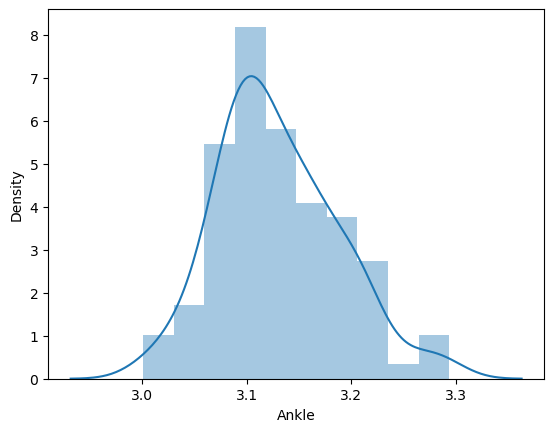

In [77]:
bf.loc[bf["Ankle"]>U1,"Ankle"]=U1
sns.distplot(bf.Ankle)

<Axes: ylabel='Biceps'>

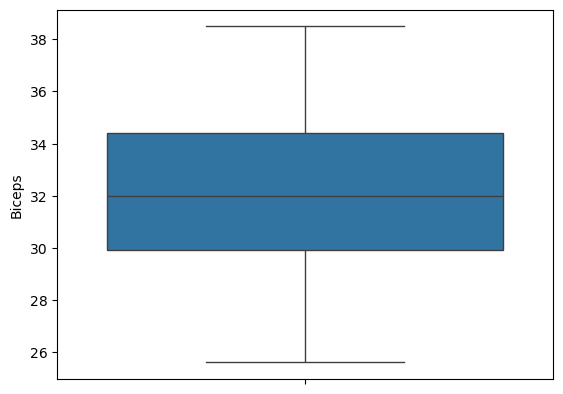

In [78]:
import seaborn as sns
sns.boxplot(data=bf,y="Biceps")#no outlier is prtesent to treat.

<Axes: xlabel='Biceps', ylabel='Density'>

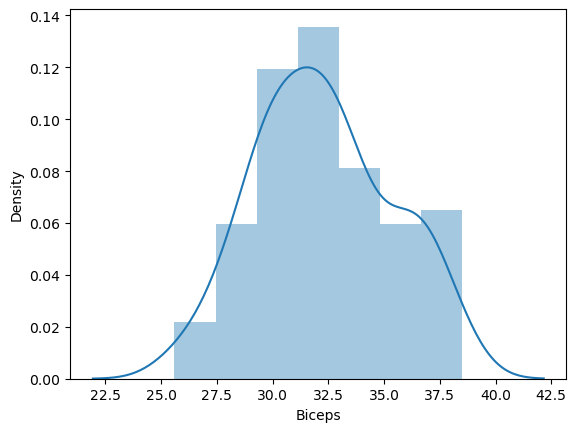

In [79]:
sns.distplot(bf.Biceps)#no skewness is present to treat.

<Axes: ylabel='Wrist'>

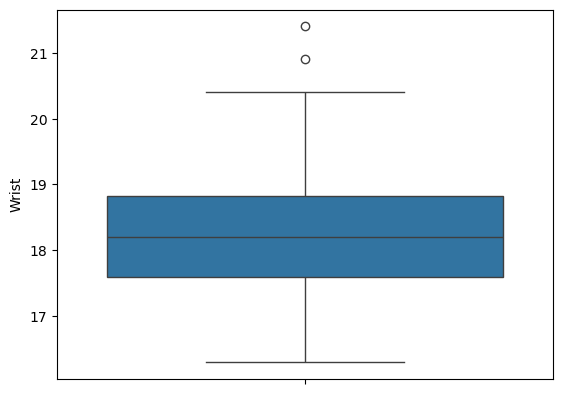

In [80]:
import seaborn as sns
sns.boxplot(data=bf,y="Wrist")

<Axes: xlabel='Wrist', ylabel='Density'>

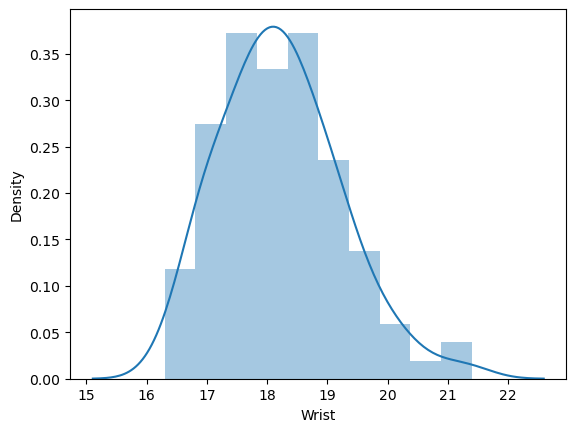

In [81]:
sns.distplot(bf.Wrist)

In [82]:
l6=bf["Wrist"]
l6

0     19.7
1     18.2
2     17.4
3     17.1
4     17.7
      ... 
95    18.1
96    17.7
97    19.7
98    18.4
99    16.8
Name: Wrist, Length: 100, dtype: float64

In [83]:
outliers=[]
def detect_outlier(l6):
 threshold=3
 mean=np.mean(l6)
 std=np.std(l6)
 for i in l1:
     z_score=(i-mean)/std
 if np.abs(z_score)>threshold:
    outliers.append(i)
 return outliers
 detect_outlier(l6)

In [84]:
ub=bf["Wrist"].mean()+3*bf["Wrist"].std()
lb=bf["Wrist"].mean()-3*bf["Wrist"].std()
print(ub,lb)

21.21896749330427 15.223032506695729


In [85]:
bf["Wrist"].describe()

count    100.000000
mean      18.221000
std        0.999322
min       16.300000
25%       17.600000
50%       18.200000
75%       18.825000
max       21.400000
Name: Wrist, dtype: float64

<Axes: ylabel='Wrist'>

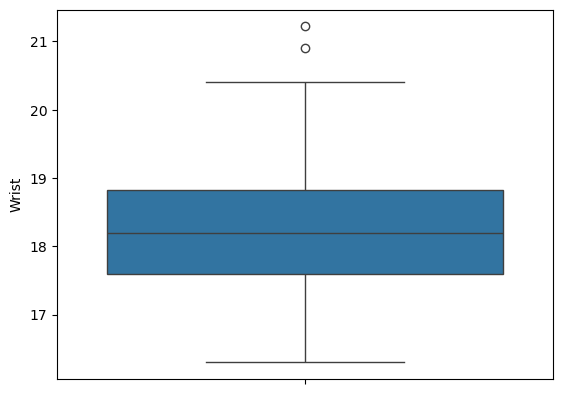

In [86]:
bf.loc[bf["Wrist"]>ub,"Wrist"]=ub
sns.boxplot(data=bf,y="Wrist")

skewness treatment::

In [88]:
bf.Wrist.skew()

0.5093946831634274

In [89]:
import numpy as np
np.log(0)

-inf

In [90]:
bf_new=bf[bf.Wrist>0]

In [91]:
bf["Wrist"]=np.log(bf["Wrist"])
bf.Wrist.skew()

0.36066718026091005

In [92]:
IQR=bf.Wrist.quantile(0.75)-bf.Wrist.quantile(0.25)
L1=bf["Wrist"].quantile(0.25)-(IQR*3)
U1=bf["Wrist"].quantile(0.75)+(IQR*3)
print(L1,U1)

2.6660462094964448 3.1370358254409885


<Axes: xlabel='Wrist', ylabel='Density'>

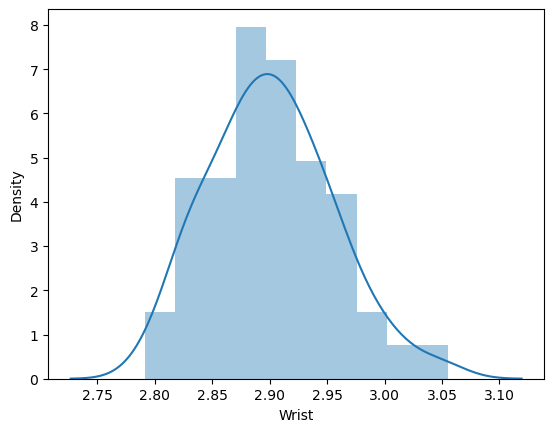

In [93]:
bf.loc[bf["Wrist"]>U1,"Wrist"]=U1
sns.distplot(bf.Wrist)

In [94]:
data1=bf.corr()
data1

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
Bodyfat,1.000000,0.255798,0.595959,0.032210,0.504443,0.684330,0.817153,0.386829,0.418107,0.368796
Age,0.255798,1.000000,-0.097905,-0.268673,0.038501,0.074261,0.148374,-0.074250,-0.079398,0.213889
Weight,0.595959,-0.097905,1.000000,0.568433,0.838977,0.914930,0.884753,0.788685,0.786266,0.753226
Height,0.032210,-0.268673,0.568433,1.000000,0.370396,0.357975,0.280887,0.460918,0.435460,0.429865
Neck,0.504443,0.038501,0.838977,0.370396,1.000000,0.792114,0.773105,0.664063,0.701067,0.777178
Chest,0.684330,0.074261,0.914930,0.357975,0.792114,1.000000,0.916735,0.690288,0.739109,0.686739
Abdomen,0.817153,0.148374,0.884753,0.280887,0.773105,0.916735,1.000000,0.628682,0.658290,0.662106
Ankle,0.386829,-0.074250,0.788685,0.460918,0.664063,0.690288,0.628682,1.000000,0.650358,0.691841
Biceps,0.418107,-0.079398,0.786266,0.435460,0.701067,0.739109,0.658290,0.650358,1.000000,0.635754
Wrist,0.368796,0.213889,0.753226,0.429865,0.777178,0.686739,0.662106,0.691841,0.635754,1.000000


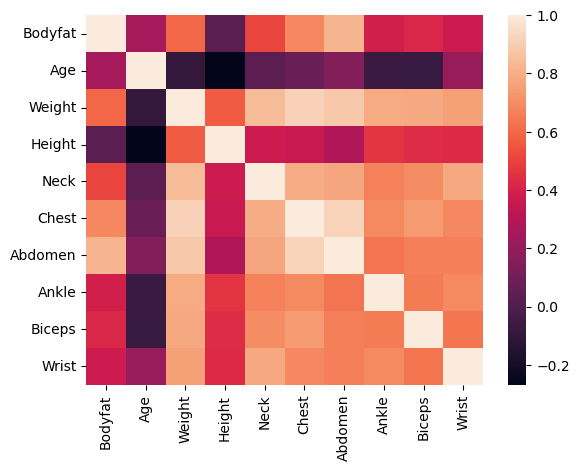

In [95]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data1)
plt.show()

Model Building ::

In [97]:
x=bf.iloc[:,1:]

In [98]:
x.head()
x.shape

(100, 9)

In [99]:
y=bf.iloc[:,0]

In [100]:
y.head()
y.shape

(100,)

In [101]:
import sklearn
from sklearn.model_selection import train_test_split

In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=120)

In [103]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((70, 9), (30, 9), (70,), (30,))

In [104]:
from sklearn import linear_model
linear=linear_model.LinearRegression()

In [105]:
linear.fit(x_train,y_train)

LinearRegression()

In [106]:
pred=linear.predict(x_test)
pred

array([12.97816757, 17.21564945, 22.65437851, 16.23583271,  8.58166031,
       15.01862717, 16.67465531, 26.87247025, 16.06543229, 16.74427449,
       23.21661163, 16.97676233, 15.33811135, 24.92097153, 16.78016   ,
       16.7764771 , 20.57741034, 32.24967849,  9.62000952, 13.10749237,
       26.30414167,  6.02924752, 17.56259326, 21.75418511, 23.07047413,
       22.22700984, 17.02152117, 17.48913912, 18.48516643, 37.44679252])

In [107]:
linear.coef_

array([ 4.74093140e-02, -9.75541117e-02, -1.55416417e-01,  7.32730418e-02,
       -1.43213817e+01,  9.33623302e+01,  2.90303155e+01,  1.60929404e-01,
       -3.86075852e+01])

In [108]:
linear.intercept_

-297.30895337053795

In [109]:
R2=linear.score(x_train,y_train)
R2

0.7853383517943974

In [110]:
Adj_R2=1-(((1-R2)*(70-1))/(70-9-1))
Adj_R2

0.7531391045635569

In [111]:
pred_train=linear.predict(x_train)
pred_train

array([20.67399924, 19.39961355, 14.50575877, 21.13345977, 27.27019985,
       29.04937183, 27.26335498, 16.22675668, 24.59171659, 10.71226107,
       14.38984891,  8.22020438, 21.29886332, 18.48776129, 23.41838039,
        9.97932024, 23.02736139, 15.36538681, 18.95336965, 26.10576092,
       17.01606042, 16.21812868, 19.73078728, 24.72694402, 12.24008059,
       15.74997505,  9.01328301,  8.49555106, 26.58142898, 15.84999399,
       19.73536491,  3.41497618, 15.42949072, 28.92519961,  3.78440248,
       23.77567627, 14.31473266,  8.0816682 , 26.68376201, 10.67895687,
       29.82610937, 21.2430069 , 13.33996314,  9.9800851 , 18.5557834 ,
       25.23262756, 34.55704587, 16.32686803, 18.55078501, 10.90715457,
       21.63395799, 19.41721936, 15.13801646,  9.17105289, 20.55063365,
        5.6567994 , 24.39024821, 16.05373842, 24.95584381, 13.09362597,
       15.8314034 , 17.54204403, 17.44743127, 23.85466355, 34.6837367 ,
       27.76383288, 17.58854185, 27.20180772, 33.30391059, 23.48

In [112]:
pred_train.shape

(70,)

In [113]:
mean_y=y_train.mean()
mean_y

18.82571428571428

In [114]:
SSE=np.sum(np.square(pred_train-y_train))
SSE

984.9736234896186

In [115]:
SSR=np.sum(np.square(pred_train-mean_y))
SSR

3603.520090796101

In [116]:
Rsq=SSR/(SSR+SSE)
Rsq

0.7853383517943977

In [117]:
from sklearn import metrics
#MAE-Mean Absolute Error
MAE=metrics.mean_absolute_error(pred,y_test)
MAE

3.6281468969393433

In [118]:
#MSE=Mean Squared Error
MSE=metrics.mean_squared_error(pred,y_test)
MSE

20.0586461645979

In [119]:
RMSE=np.sqrt(MSE)
RMSE

4.478687995897671

In [120]:
#MAPE
error=pred-y_test
error
error_abs=np.abs(error)
error_abs

80     4.021832
38     5.184351
5      0.054379
61     2.635833
93     4.881660
66     6.481373
41     0.025345
65     3.272470
3      3.765432
72    11.544274
32     0.983388
55     4.823238
87     7.538111
35     8.420972
12     0.119840
16     5.476477
31     2.277410
78     6.249678
36     1.779990
18     4.307492
57     0.504142
64     0.729248
40     3.237407
51     3.445815
29     1.429526
42     2.627010
90     5.078479
86     3.310861
85     1.985166
25     2.653207
Name: Bodyfat, dtype: float64

In [121]:
MAPE=np.mean(error_abs/y_test)*100
MAPE

31.365449729595447

In [122]:
Accuracy=(100-MAPE)
Accuracy

68.63455027040456

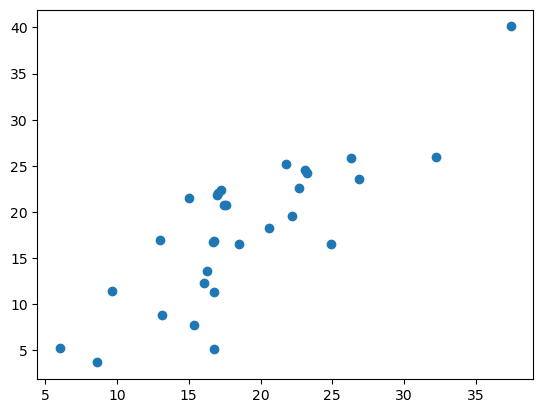

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.scatter(pred,y_test)
plt.show()

In [124]:
from scipy import stats
slope,intercepts,r,p,std_err=stats.linregress(pred,y_test)
def myfunc(y_test):
 return slope*y_test+intercepts
mymodel=list(map(myfunc,y_test))

#Lasso-L1::

In [126]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(x_train,y_train)
Lasso()
bf.head(1)

,Bodyfat,Age,Weight,Height,Neck,Chest,Abdomen,Ankle,Biceps,Wrist
0,32.3,41.0,247.25,73.5,42.1,4.762174,4.750136,3.269569,37.3,2.980619


In [127]:
lasso.coef_

array([ 0.1484064 ,  0.22347935, -0.79116278, -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ])

In [128]:
#y(bf)=B0+X1.Age+X2.Weight+X3.Height+X4.Neck+X5.Chest+X6.Abdomen+X7.Ankle+X8.Biceps+X9.Wrist
#lungcap,age,height--data(LR)---R2,Adj_R2

In [129]:
l1_pred=lasso.predict(x_test)
l1_pred

array([14.04946927, 15.09469769, 23.22752586, 10.74934837, 10.95630968,
       13.82468947, 14.38635989, 27.28403394, 12.21214776, 14.67498159,
       23.68194913, 15.00665365, 20.0785304 , 21.99708847, 16.09111623,
       19.05177857, 17.59662931, 30.18107443, 13.41736953, 14.49389451,
       23.75259749,  6.40440416, 18.87587658, 21.70755568, 23.40785296,
       26.87146148, 13.04374426, 18.02960345, 13.76005311, 26.62688739])

In [130]:
l1_R2=lasso.score(x_train,y_train)
l1_R2

0.5684362407517517

In [131]:
l1_adj_R2=1-(((1-l1_R2)*(580-1))/(580-5-1))
l1_adj_R2

0.5646769745562095

In [132]:
df=pd.DataFrame({"Feature_importances":lasso.coef_,"columns":list(x)})
df

,Feature_importances,columns
0,0.148406,Age
1,0.223479,Weight
2,-0.791163,Height
3,-0.000000,Neck
4,0.000000,Chest
5,0.000000,Abdomen
6,-0.000000,Ankle
7,-0.000000,Biceps
8,-0.000000,Wrist


In [133]:
df2=pd.DataFrame({"Actual":y_test,"Predictions":l1_pred})
df2

,Actual,Predictions
80,17.0,14.049469
38,22.4,15.094698
5,22.6,23.227526
61,13.6,10.749348
93,3.7,10.956310
66,21.5,13.824689
41,16.7,14.386360
65,23.6,27.284034
3,12.3,12.212148
72,5.2,14.674982


In [134]:
MSE_l1=metrics.mean_squared_error(l1_pred,y_test)
MSE_l1

32.919176732050836

In [356]:
MAPE_l1=np.mean(error_abs/y_test)*100
MAPE_l1

31.365449729595447

In [358]:
Accuracy=(100-MAPE)
Accuracy

68.63455027040456

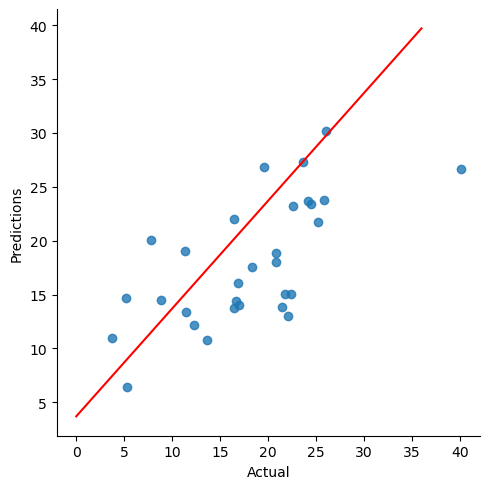

In [135]:
sns.lmplot(x="Actual",y="Predictions",data=df2,fit_reg=False)
d_line=np.arange(df2.min().min(),df2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Ridge (L2)::

In [137]:
from sklearn.linear_model import Ridge
rd=Ridge()
rd.fit(x_train,y_train)
Ridge()

Ridge()

In [138]:
rd_pred=rd.predict(x_test)
rd_pred

array([14.71269601, 15.9546098 , 22.67924034, 12.1776467 , 10.61475772,
       13.89118539, 14.94253314, 26.76728534, 12.55388058, 15.29346479,
       24.25758134, 14.70012623, 18.44799179, 21.45874855, 15.64041546,
       19.02736179, 18.4364282 , 29.62308734, 13.15589282, 13.3832519 ,
       24.83117524,  6.35036514, 18.15237681, 21.59264278, 23.07615159,
       25.87934234, 13.72896073, 18.24242692, 14.04098821, 29.71331253])

In [139]:
list(rd.coef_)

[0.1434539934833823,
 0.24170780936885466,
 -0.9557028283801512,
 -0.32717882639953305,
 0.6150167923717281,
 8.085116289287233,
 -0.0469620354062651,
 -0.17727111243567398,
 -3.1630124358663583]

In [140]:
rd_R2=rd.score(x_train,y_train)
rd_R2

0.6131719258363183

In [141]:
rd_adj_R2=1-(((1-rd_R2)*(70-1))/(70-9-1))
rd_adj_R2

0.555147714711766

In [142]:
df_1=pd.DataFrame({"Feature_importances":rd.coef_,"columns":list(x)})
df_1

,Feature_importances,columns
0,0.143454,Age
1,0.241708,Weight
2,-0.955703,Height
3,-0.327179,Neck
4,0.615017,Chest
5,8.085116,Abdomen
6,-0.046962,Ankle
7,-0.177271,Biceps
8,-3.163012,Wrist


In [143]:
df_2=pd.DataFrame({"Actual":y_test,"Predictions":rd_pred})
df_2

,Actual,Predictions
80,17.0,14.712696
38,22.4,15.954610
5,22.6,22.679240
61,13.6,12.177647
93,3.7,10.614758
66,21.5,13.891185
41,16.7,14.942533
65,23.6,26.767285
3,12.3,12.553881
72,5.2,15.293465


In [144]:
MSE_rd=metrics.mean_squared_error(rd_pred,y_test)
MSE_rd

27.018554537860336

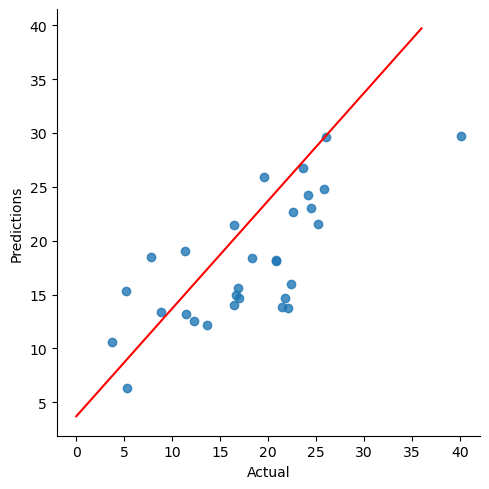

In [145]:
sns.lmplot(x="Actual",y="Predictions",data=df_2,fit_reg=False)
d_line=np.arange(df_2.min().min(),df_2.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Feature Selection::

In [147]:
df

,Feature_importances,columns
0,0.148406,Age
1,0.223479,Weight
2,-0.791163,Height
3,-0.000000,Neck
4,0.000000,Chest
5,0.000000,Abdomen
6,-0.000000,Ankle
7,-0.000000,Biceps
8,-0.000000,Wrist


In [160]:
bf.shape

(100, 10)

In [162]:
l_new=bf.drop(["Neck","Chest","Abdomen","Ankle","Biceps","Wrist"],axis=1)
l_new.shape

(100, 4)

In [164]:
l_new.isnull().sum()
l_new.dtypes

Bodyfat    float64
Age        float64
Weight     float64
Height     float64
dtype: object

In [166]:
x1=l_new.iloc[:,1:]
x1.head()
y1=l_new.iloc[:,0]
y1.head()

0    32.3
1    22.5
2    22.0
3    12.3
4    20.5
Name: Bodyfat, dtype: float64

In [185]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=120)
x1_train.shape,x1_test.shape,y1_train.shape,y1_test.shape

((80, 3), (20, 3), (80,), (20,))

In [201]:
linear.fit(x1_train,y1_train)
LinearRegression()

LinearRegression()

In [203]:
linear_new_pred=linear.predict(x1_test)
linear_new_pred

array([15.54380385, 14.97534722, 23.25990414, 11.25569496, 10.57969997,
       13.74084405, 14.87166661, 26.86736572, 13.12759627, 15.76058329,
       24.43849524, 15.04733408, 18.75662279, 21.56189963, 15.96207604,
       20.63992874, 18.1785114 , 30.51646304, 13.84528203, 15.08671905])

In [205]:
new_R2=linear.score(x1_train,y1_train)
new_R2

0.5778558155063089

In [207]:
Adjnew_R2=1-(((1-new_R2)*(70-1))/(70-9-1))
Adjnew_R2

0.5145341878322552

In [209]:
new_MSE=metrics.mean_squared_error(linear_new_pred,y1_test)
new_MSE

32.114825078978626

In [211]:
df_new=pd.DataFrame({"Actual_n":y1_test,"Predictions_n":linear_new_pred})
df_new

,Actual_n,Predictions_n
80,17.0,15.543804
38,22.4,14.975347
5,22.6,23.259904
61,13.6,11.255695
93,3.7,10.579700
66,21.5,13.740844
41,16.7,14.871667
65,23.6,26.867366
3,12.3,13.127596
72,5.2,15.760583


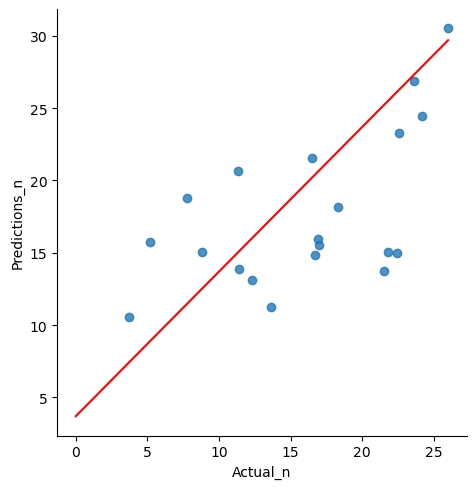

In [348]:
sns.lmplot(x="Actual_n",y="Predictions_n",data=df_new,fit_reg=False)
d_line=np.arange(df_new.min().min(),df_new.max().max())
plt.plot(d_line,color="red",linestyle="-")
plt.show()

Final Result::

In [350]:
list1=["Linear Regression","Lasso","Ridge","Feature_SelectionModel"]
list2=[R2,l1_R2,rd_R2,new_R2]
list3=[Adj_R2,l1_adj_R2,rd_adj_R2,Adjnew_R2]
list4=[MSE,MSE_l1,MSE_rd,new_MSE]

In [352]:
Final_Result=pd.DataFrame({"Model_Name":list1,"R2_value":list2,"Adj_R2":list3,"MSE":list4})
Final_Result

,Model_Name,R2_value,Adj_R2,MSE
0,Linear Regression,0.785338,0.753139,20.058646
1,Lasso,0.568436,0.564677,32.919177
2,Ridge,0.613172,0.555148,27.018555
3,Feature_SelectionModel,0.577856,0.514534,32.114825


Final result::According to R2 and MSE value Linear regression model is better fitted for this  dataset .Due to low accuracy performance value feature selection of RF model technique has applied here to find out proper linearity and boosted predicted values . 